In [1]:
%matplotlib inline
import pandas as pd

In [2]:
# Read in Movies (m) and Ratings (r) from MovieLens Data
m = pd.read_csv('Data/MovieLens/ml-20m/movies.csv').head(100000)
r = pd.read_csv('Data/MovieLens/ml-20m/ratings.csv').head(100000)

In [3]:
m.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
r.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [5]:
# Find the average movie rating and store in 'mr'
mr = pd.DataFrame(r[['movieId','rating']].groupby('movieId').mean())
mr.head()

,rating
movieId,
1,3.968880
2,3.250000
3,3.230159
4,3.384615
5,3.253623


In [6]:
# Count the number of ratings and store in 'mc'. Sort by highest number of ratings forst
mc = pd.DataFrame(r[['movieId','rating']].groupby('movieId').size(), columns=['num_ratings']).sort_values(by='num_ratings', ascending=0)
mc.head()

,num_ratings
movieId,
296,350
356,340
318,305
480,302
593,295


In [7]:
# Show all movies, number of ratings 'num_ratings' and average rating 'rating'
mrmc = mc.merge(mr, right_index=1, left_index=1)
mrmc.head()

,num_ratings,rating
movieId,,
1,241,3.968880
2,112,3.250000
3,63,3.230159
4,13,3.384615
5,69,3.253623


In [8]:
# Show the top 10 movies if sorted by average rating, then number of ratings
top = (m.merge(mrmc,how='left', left_on='movieId',right_index=1).groupby('title').mean().
    sort_values(['rating','num_ratings'], ascending=[0,0]))
top.head(10)

,movieId,num_ratings,rating
title,,,
CJ7 (Cheung Gong 7 hou) (2008),58652.0,3.0,5.0
Cosi (1996),705.0,2.0,5.0
Cries and Whispers (Viskningar och rop) (1972),4422.0,2.0,5.0
Dear Diary (Caro Diario) (1994),583.0,2.0,5.0
"Effect of Gamma Rays on Man-in-the-Moon Marigolds, The (1972)",3069.0,2.0,5.0
Fellini's Roma (Roma) (1972),4283.0,2.0,5.0
Sonic Outlaws (1995),134.0,2.0,5.0
"Spy Who Came in from the Cold, The (1965)",8772.0,2.0,5.0
Wall Street: Money Never Sleeps (2010),80590.0,2.0,5.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12313a590>]], dtype=object)

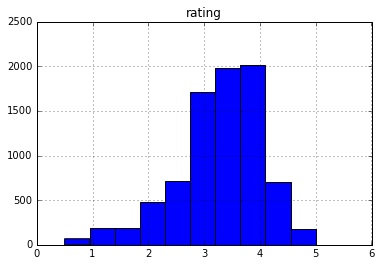

In [9]:
# Show the rating distribution across all films
pd.DataFrame.hist(mrmc,'rating', bins=10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11328b7d0>]], dtype=object)

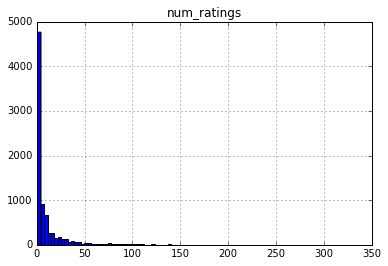

In [10]:
# Show the distribution of number of ratings
pd.DataFrame.hist(mc, column='num_ratings', bins=100)

In [11]:
# Based on the above, it appears many films have < 100 ratings...

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x113a0d590>]], dtype=object)

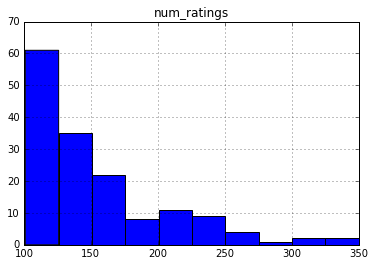

In [12]:
# Zoom in on distribution for num_ratings > 100
pd.DataFrame.hist(mc[mc.num_ratings>100], column='num_ratings', bins=10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1143ba110>]], dtype=object)

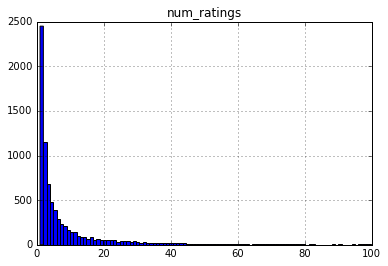

In [13]:
# Zoom in on distribution for num_ratings <= 100
pd.DataFrame.hist(mc[mc.num_ratings<=100], column='num_ratings', bins=100)

In [14]:
# Show the top 10 movies if sorted by average rating, then number of ratings, ...
# for only those that have > 100 ratings
top_better = (m.merge(mrmc[mrmc.num_ratings>100],how='left', left_on='movieId',right_index=1).groupby('title').mean().
    sort_values(['rating','num_ratings'], ascending=[0,0]))
top_better.head(10)

,movieId,num_ratings,rating
title,,,
"Godfather: Part II, The (1974)",1221.0,137.0,4.419708
"Shawshank Redemption, The (1994)",318.0,305.0,4.413115
"Godfather, The (1972)",858.0,197.0,4.395939
One Flew Over the Cuckoo's Nest (1975),1193.0,148.0,4.354730
"Usual Suspects, The (1995)",50.0,224.0,4.337054
"Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",4973.0,128.0,4.273438
Fight Club (1999),2959.0,207.0,4.270531
Schindler's List (1993),527.0,247.0,4.263158
Casablanca (1942),912.0,122.0,4.237705


In [15]:
# Show the most common genre combinations in 'cgc'
cgc = pd.DataFrame(m.genres.value_counts().head(20))
cgc

,genres
Drama,4520
Comedy,2294
Documentary,1942
Comedy|Drama,1264
Drama|Romance,1075
Comedy|Romance,757
Comedy|Drama|Romance,605
Horror,565
Crime|Drama,448
Drama|Thriller,426


In [16]:
# Find all unique genres in array 'g' (assuming there is at least one film, with this single genre combo)
g = pd.DataFrame(m[~m.genres.str.contains('[|]|[(]')].groupby('genres').size())
g = g.index.values
g

array(['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western'], dtype=object)

In [17]:
# Show the top 10 films with a comedy genre
df = top_better.merge(m)
top_comedy = df[df.genres.str.contains('Comedy')].head(10)
top_comedy

,movieId,num_ratings,rating,title,genres
5,4973.0,128.0,4.273438,"Amelie (Fabuleux destin d'Amélie Poulain, Le) ...",Comedy|Romance
11,1136.0,166.0,4.186747,Monty Python and the Holy Grail (1975),Adventure|Comedy|Fantasy
13,750.0,122.0,4.151639,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War
17,2858.0,238.0,4.128151,American Beauty (1999),Comedy|Drama
22,296.0,350.0,4.100000,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
29,356.0,340.0,4.058824,Forrest Gump (1994),Comedy|Drama|Romance|War
32,1197.0,165.0,4.039394,"Princess Bride, The (1987)",Action|Adventure|Comedy|Fantasy|Romance
34,608.0,230.0,4.039130,Fargo (1996),Comedy|Crime|Drama|Thriller
40,223.0,121.0,4.008264,Clerks (1994),Comedy
44,778.0,120.0,3.979167,Trainspotting (1996),Comedy|Crime|Drama


In [18]:
# Show the top 10 films with a romance genre
df = top_better.merge(m)
top_romance = df[df.genres.str.contains('Romance')].head(10)
top_romance

,movieId,num_ratings,rating,title,genres
5,4973.0,128.0,4.273438,"Amelie (Fabuleux destin d'Amélie Poulain, Le) ...",Comedy|Romance
8,912.0,122.0,4.237705,Casablanca (1942),Drama|Romance
18,7361.0,113.0,4.119469,Eternal Sunshine of the Spotless Mind (2004),Drama|Romance|Sci-Fi
29,356.0,340.0,4.058824,Forrest Gump (1994),Comedy|Drama|Romance|War
32,1197.0,165.0,4.039394,"Princess Bride, The (1987)",Action|Adventure|Comedy|Fantasy|Romance
43,3996.0,111.0,3.986486,"Crouching Tiger, Hidden Dragon (Wo hu cang lon...",Action|Drama|Romance
47,1704.0,130.0,3.965385,Good Will Hunting (1997),Drama|Romance
49,4995.0,107.0,3.953271,"Beautiful Mind, A (2001)",Drama|Romance
72,2396.0,128.0,3.855469,Shakespeare in Love (1998),Comedy|Drama|Romance
74,1265.0,150.0,3.846667,Groundhog Day (1993),Comedy|Fantasy|Romance


In [19]:
# Show the top 10 films with a drama genre
df = top_better.merge(m)
top_romance = df[df.genres.str.contains('Drama')].head(10)
top_romance

,movieId,num_ratings,rating,title,genres
0,1221.0,137.0,4.419708,"Godfather: Part II, The (1974)",Crime|Drama
1,318.0,305.0,4.413115,"Shawshank Redemption, The (1994)",Crime|Drama
2,858.0,197.0,4.395939,"Godfather, The (1972)",Crime|Drama
3,1193.0,148.0,4.354730,One Flew Over the Cuckoo's Nest (1975),Drama
6,2959.0,207.0,4.270531,Fight Club (1999),Action|Crime|Drama|Thriller
7,527.0,247.0,4.263158,Schindler's List (1993),Drama|War
8,912.0,122.0,4.237705,Casablanca (1942),Drama|Romance
10,1213.0,132.0,4.189394,Goodfellas (1990),Crime|Drama
12,2329.0,126.0,4.162698,American History X (1998),Crime|Drama
16,1208.0,122.0,4.135246,Apocalypse Now (1979),Action|Drama|War


In [22]:
# Aggregate data across of different unique ratings
df = m.merge(r,right_index=1,left_index=1)[['title','genres','movieId_x']]
df = df.rename(columns={'movieId_x': 'movieId'})

genre_agg = pd.DataFrame()

for genre in g:
    df[genre] = df.genres.str.contains(genre)
    
for genre in g:
    t1 = sum(m.genres.str.contains(genre))
    t2 = r.merge(df[df[genre]])
    d = {}
    d['genre'] = genre
    d['rating'] = t2.rating.mean()
    d['num_ratings'] = len(t2.rating)
    d['total_movies'] = t1
    genre_agg = genre_agg.append(d, ignore_index=1)

genre_agg.sort_values(by=['rating','num_ratings'], ascending=[0,0])

,genre,num_ratings,rating,total_movies
9,Film-Noir,1037.0,4.016393,330.0
17,War,5192.0,3.799307,1194.0
6,Documentary,1231.0,3.759139,2471.0
13,Mystery,7695.0,3.669591,1514.0
7,Drama,43172.0,3.667435,13344.0
5,Crime,16222.0,3.665608,2939.0
11,IMAX,2438.0,3.662633,196.0
2,Animation,5654.0,3.560842,1027.0
12,Musical,4299.0,3.534543,1036.0
14,Romance,18930.0,3.532805,4127.0


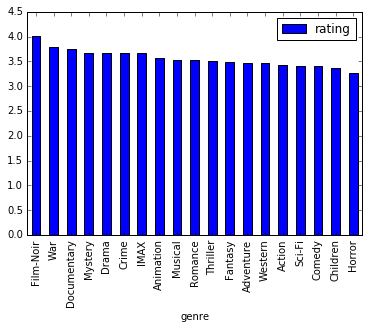

In [27]:
# Plot the most popular genres by rating
genre_agg[['genre','rating']].set_index('genre').sort_values(by='rating',ascending=0).plot(kind='bar')

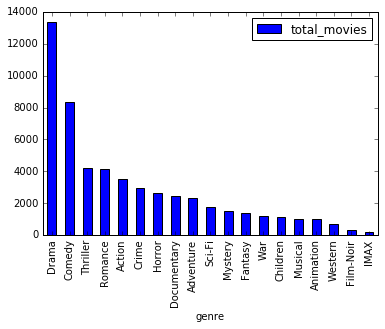

In [29]:
# Plot the most popular genres by film-maker
genre_agg[['genre','total_movies']].set_index('genre').sort_values(by='total_movies',ascending=0).plot(kind='bar')